
### Academic Honesty: All the code below is written only by me and no AI tool was used and no code was copied from anywhere

#Traffic Scenario Benchmark Simulation




We use solve ivp from scipy.integrate library for solving nonlinear continuous systems so, we import this library in addition to other necessary libraries.

In [2]:
from scipy.optimize import fsolve
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import matplotlib.animation as animation
import math
from scipy.integrate import odeint

$$
\begin{aligned}
    \dot{\delta} &= u_1 + w_1 \\
    \dot{\psi} &= \frac{v}{I_{wb}}\tan\delta \\
    \dot v &= u_2 + w_2 \\
    \dot{s}_x &= v \cos\psi \\
    \dot{s}_y &= v \sin\psi
\end{aligned}
$$

x is a state vector that x ∈ R5 which consists of as δ is the steering angle, ψ is vehicle
 heading, v is the velocity, sx is the position in the x-axis and sy is the position in the y
 axis. u1 is the velocity of the steering angle and u2 is the acceleration. w1 and w2 are
 model disturbances affecting the vehicle. We considered sets of measurement error Z,
 input U, and disturbance W in our simulation. we used random values from each set of
 these vectors in our simulation. All of the state variables in the state vector x are scalar
 values.

In [3]:
I_wb = 2.5

z = [[-0.0004,0.0004],
     [-0.0004,0.0004],
     [-0.006,0.006],
     [-0.002,0.002],
     [-0.002,0.002]]


u = [[-0.7,0.7],
     [-11,11]]

w = [[-0.02,0.02],
     [-0.3,0.3]]

traffic_input_list = [0]*5


initial_conditions_traffic = [
    [random.randint(0,10) for _ in range(5)]
    for _ in range(30)
]


print(initial_conditions_traffic)

def traffic_benchmark(t,state):

    delta,psi,v,s_x,s_y = state
    delta_dot = random.uniform(u[0][0],u[0][1]) + random.uniform(w[0][0],w[0][1])
    psi_dot = (v/I_wb) * np.tan(delta)
    v_dot = random.uniform(u[1][0],u[1][1]) + random.uniform(w[1][0],w[1][1])
    s_x_dot = v * np.cos(psi)
    s_y_dot = v * np.sin(psi)
    return [delta_dot,psi_dot,v_dot,s_x_dot,s_y_dot]



[[10, 6, 3, 7, 7], [1, 3, 8, 8, 4], [9, 0, 6, 9, 0], [5, 3, 7, 1, 10], [6, 10, 3, 6, 2], [7, 2, 8, 7, 3], [10, 7, 3, 7, 8], [5, 2, 2, 6, 0], [5, 1, 3, 3, 0], [0, 9, 0, 6, 5], [1, 9, 9, 9, 2], [2, 3, 2, 0, 8], [2, 4, 1, 5, 6], [9, 0, 3, 8, 7], [6, 3, 2, 10, 5], [8, 8, 7, 10, 10], [3, 7, 9, 6, 7], [8, 1, 9, 9, 0], [1, 1, 1, 10, 0], [2, 3, 1, 0, 2], [0, 9, 7, 2, 2], [4, 1, 4, 4, 3], [3, 4, 10, 7, 5], [7, 10, 9, 1, 7], [8, 4, 2, 6, 0], [9, 10, 8, 0, 8], [10, 1, 10, 3, 3], [10, 10, 4, 10, 6], [1, 1, 5, 3, 6], [9, 6, 10, 0, 0]]


The code below shows change of δ value over time. This figure is obtained by
 using solve ivp for solving the traffic benchmark model with 30 sets of random initial
 conditions. As explained in part 2 of this paper, we plotted the first output in the output
 set versus time and we used the RK45 method for this solution. This figure shows that
 the vehicle’s steering angle does not change much from its initial value.

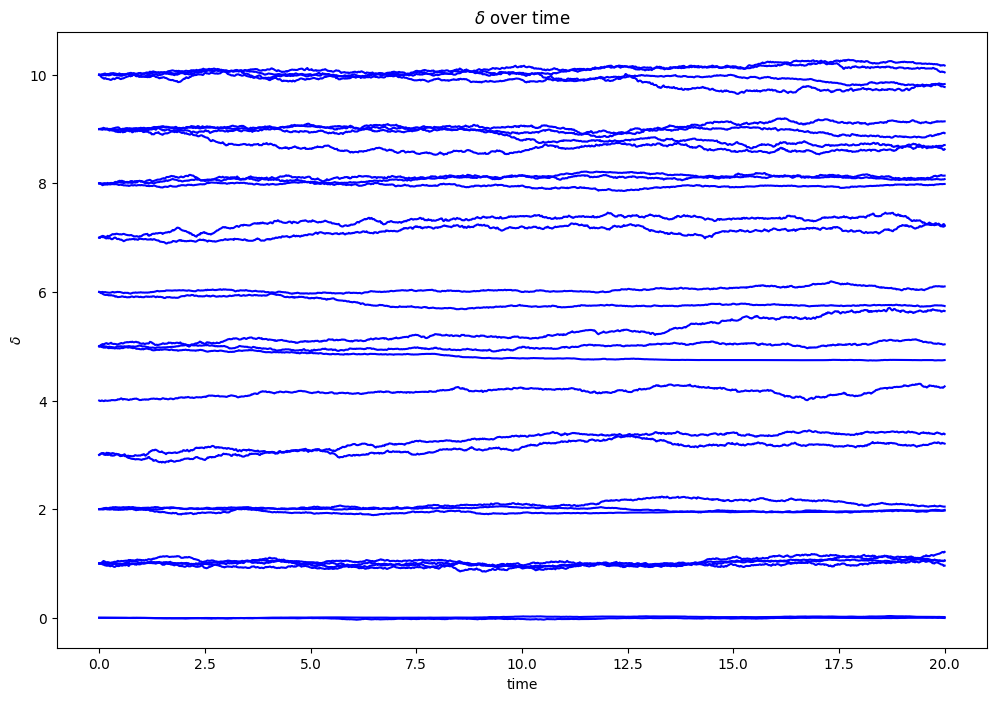

In [4]:
plt.figure(figsize=(12,8))
for i, initial_condition in enumerate(initial_conditions_traffic):
    solution_to_traffic = solve_ivp(traffic_benchmark,[0,20],initial_condition,method='RK45',t_eval=np.linspace(0,20,1000))
    plt.plot(solution_to_traffic.t,solution_to_traffic.y[0],color = 'blue')


plt.ylabel("$\delta$")
plt.xlabel("time")
plt.title("$\delta$ over time")
plt.show()

 The code below shows the change of ψ value over time. The heading angle of the
 vehicle might change drastically from its initial value. For plotting this figure, we used
 the second item in the traffic benchmark ˙ ψ output set in the solve ivp solution form. The
 initial conditions are randomly selected from 0 to 10 for each and the method we used
 for this solution is RK45.

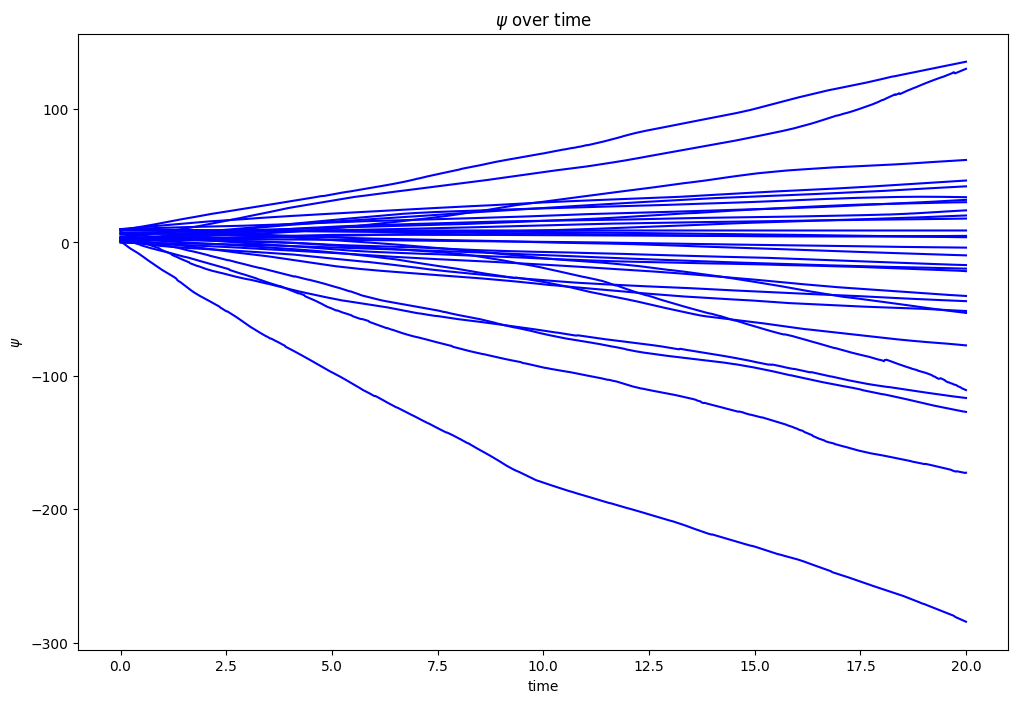

In [5]:
plt.figure(figsize=(12,8))
for i, initial_condition in enumerate(initial_conditions_traffic):
    solution_to_traffic = solve_ivp(traffic_benchmark,[0,20],initial_condition,method='RK45',t_eval=np.linspace(0,20,1000))
    plt.plot(solution_to_traffic.t,solution_to_traffic.y[1],color = 'blue')


plt.ylabel("$\psi$")
plt.xlabel("time")
plt.title("$\psi$ over time")
plt.show()

This code below shows the change of v value over time. As we can see here, the
 velocity from each initial value has many fluctuations over time and it is because of
 choosing random values from the input set and disturbance set. For plotting this figure,
 we used the third output of the output set and the model time with 30 different random
 sets of initial conditions with the RK45 method

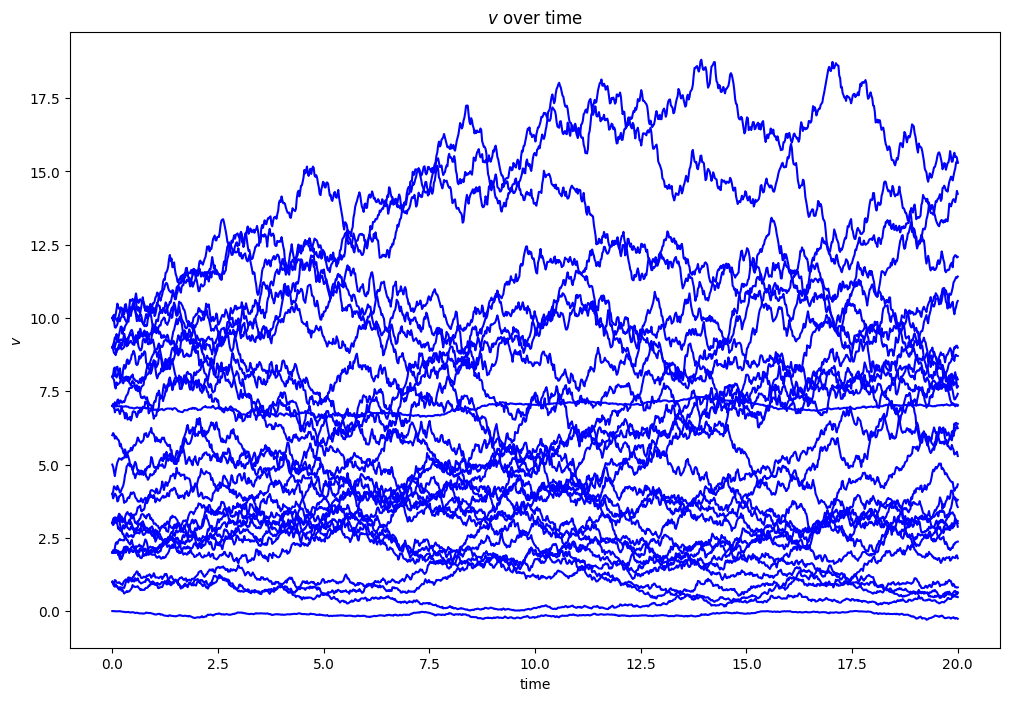

In [6]:
plt.figure(figsize=(12,8))
for i, initial_condition in enumerate(initial_conditions_traffic):
    solution_to_traffic = solve_ivp(traffic_benchmark,[0,20],initial_condition,method='RK45',t_eval=np.linspace(0,20,1000))
    plt.plot(solution_to_traffic.t,solution_to_traffic.y[2],color= 'blue')

plt.ylabel("$v$")
plt.xlabel("time")
plt.title("$v$ over time")
plt.show()

This code below shows the change of sx value over time. All initial values of sx are
 randomly from 0 to 10 and as most of the values are in the same range over time with
 f
 luctuations. However, there are some drastic changes from initial values because of the
 velocity and heading angle (˙ sx = v∗cos(ψ)). For plotting this figure, we chose the fourth
 item from the output set and put it inside the solve ivp solver. The method of solution
 for this model is RK45.

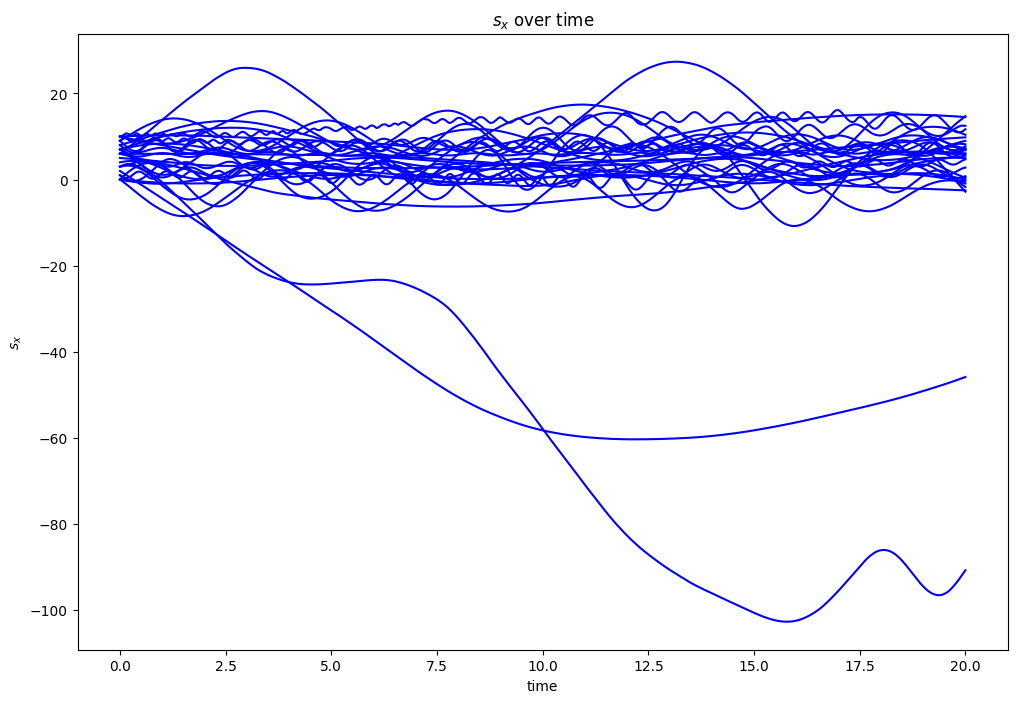

In [7]:
plt.figure(figsize=(12,8))
for i, initial_condition in enumerate(initial_conditions_traffic):
    solution_to_traffic = solve_ivp(traffic_benchmark,[0,20],initial_condition,method='RK45',t_eval=np.linspace(0,20,1000))
    plt.plot(solution_to_traffic.t,solution_to_traffic.y[3],color= 'blue')

plt.ylabel("$s_x$")
plt.xlabel("time")
plt.title("$s_x$ over time")
plt.show()

This figure shows the change of sy value over time. All initial values of sy are
 randomly from 0 to 10 and as most of the values are in the same range over time with
 f
 luctuations. However, there are some drastic changes from initial values because of the
 velocity and heading angle (˙ sy = v ∗ sin(ψ)). For plotting this figure, we chose the fifth
 item from the output set and put it inside the solve ivp solver. The method of solution
 for this model is RK45

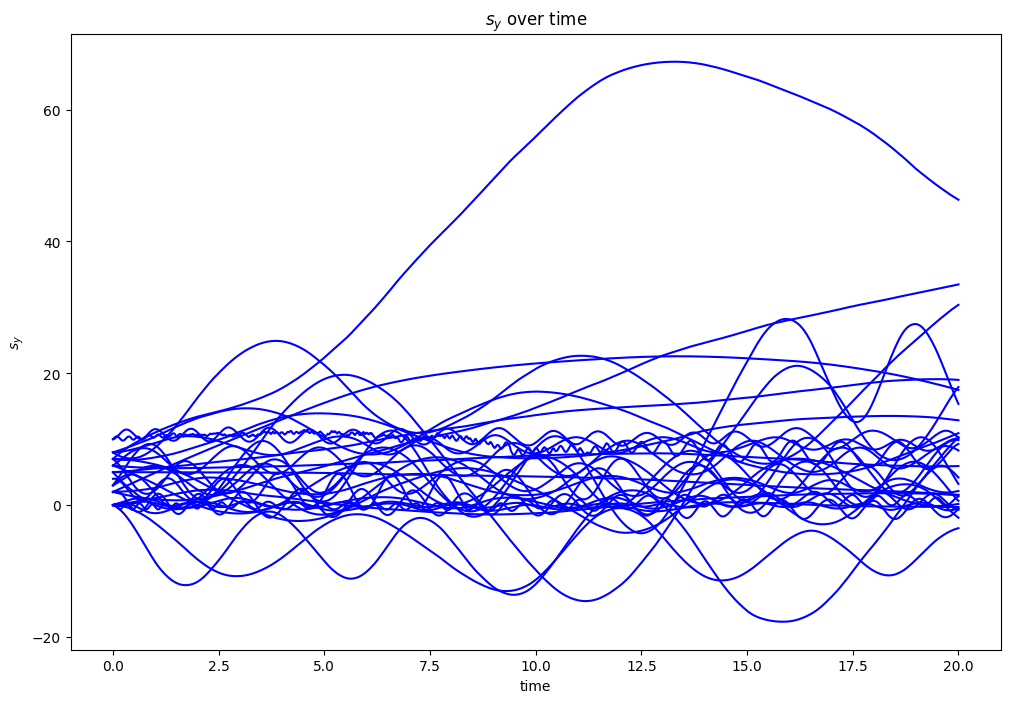

In [8]:
plt.figure(figsize=(12,8))
for i, initial_condition in enumerate(initial_conditions_traffic):
    solution_to_traffic = solve_ivp(traffic_benchmark,[0,20],initial_condition,method='RK45',t_eval=np.linspace(0,20,1000))
    plt.plot(solution_to_traffic.t,solution_to_traffic.y[4],color= 'blue')

plt.ylabel("$s_y$")
plt.xlabel("time")
plt.title("$s_y$ over time")
plt.show()